In [220]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
%matplotlib inline

In [10]:
attributes = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n',\
              'o','p','q','r','s','t','u','v','w','x','y','z']
#Build data for each attribute, start by picking either Normal or U dists
dist_select = np.random.choice([0,1],len(attributes))

all_data = []
data_points_count = 10**5
for i in dist_select:
    if i: #Use a Gaussian distribution
        mean = np.random.uniform(-100,100,1)[0]
        stdev = np.random.uniform(10,50,1)[0]
        all_data.append(np.random.normal(mean,stdev,data_points_count))
    else:
        bounds = np.random.uniform(-1000,1000,2)
        lower = min(bounds)
        upper = max(bounds)
        all_data.append(np.random.uniform(lower,upper,data_points_count))

full_df = pd.DataFrame(np.array(all_data).T,columns=attributes)
full_df.describe()

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,8.868690,79.032693,-116.726540,-590.118078,-130.761990,-5.225029,-70.553211,-44.804522,-4.847462,-181.590749,...,61.904821,9.090550,33.084123,-53.068405,39.263318,89.520910,-310.067978,-25.476412,89.803531,16.438545
std,35.174507,28.580381,46.588690,14.414420,261.369959,29.205970,22.210747,27.180446,46.941094,118.976572,...,40.847004,40.593670,44.460752,47.831338,10.656039,14.561857,229.298309,40.557091,11.102265,14.801462
min,-136.140646,-50.631452,-197.560690,-615.041554,-583.100922,-129.089575,-178.644792,-173.893001,-204.445420,-387.855694,...,-102.221007,-170.574139,-170.399711,-267.929023,-9.095185,18.256266,-707.143624,-187.680522,31.096592,-51.122964
25%,-14.960517,59.787096,-157.070245,-602.661339,-357.235067,-24.958426,-85.574331,-63.150872,-36.348930,-284.335227,...,34.226463,-18.450082,3.243641,-85.600638,32.099048,79.723073,-508.000436,-52.676208,82.343502,6.437356
50%,8.766153,79.088819,-116.689059,-590.117923,-130.709571,-5.228832,-70.661987,-44.855991,-4.596941,-182.277385,...,61.850492,9.045038,33.042412,-53.093327,39.294949,89.494209,-309.499958,-25.557536,89.779195,16.423390
75%,32.628053,98.240255,-76.371686,-577.654523,95.982037,14.572194,-55.621981,-26.636807,26.878654,-78.567612,...,89.452660,36.428223,62.831990,-20.750042,46.489209,99.308676,-111.543967,1.674266,97.278802,26.441589
max,145.949121,204.650692,-36.274490,-565.174332,322.096142,116.164272,22.950069,65.366490,205.136982,24.541227,...,234.645776,187.459023,232.057662,147.632024,86.416179,148.608080,87.437893,153.216308,136.827046,93.356563


In [218]:
full_df.to_csv('test1_data/full_dataset.csv',index=False)

In [81]:
table_attrs = []
num_tables = 5
tables_dict = {}
for i in range(num_tables):
    #Pick random number of attrs in table
    num_attrs = np.random.choice(range(8,15),1)[0]
    selected_attrs = sorted(np.random.choice(attributes,num_attrs,replace=False))
    print(num_attrs,selected_attrs)
    table_attrs.append(selected_attrs)
    tables_dict[i]=full_df[selected_attrs]


11 ['c', 'd', 'h', 'i', 'l', 'm', 'n', 'p', 'u', 'y', 'z']
12 ['a', 'c', 'e', 'k', 'l', 'p', 's', 't', 'v', 'w', 'x', 'y']
14 ['a', 'd', 'g', 'h', 'i', 'l', 'm', 'o', 'p', 'q', 'u', 'w', 'y', 'z']
9 ['a', 'f', 'g', 'h', 'i', 'j', 'k', 'm', 'o']
8 ['d', 'g', 'i', 'k', 'l', 'm', 'p', 'q']


In [219]:
for i in tables_dict.keys():
    tables_dict[i].to_csv('test1_data/table_'+str(i)+'.csv',index=False)

In [82]:
tables_dict[4].head()

,d,g,i,k,l,m,p,q
0,-586.843951,-68.773823,45.584991,-105.352421,591.399006,-128.940659,62.057734,62.461126
1,-582.607273,-61.682568,71.176782,-49.867759,-145.252443,-58.327023,68.268001,52.645227
2,-584.183609,-83.866396,-76.685752,-100.232050,180.998878,80.090106,86.473656,33.203069
3,-598.118629,-73.561304,-4.600006,-170.185149,794.701791,70.252459,79.536100,24.546831
4,-573.569738,-82.343663,-11.970637,-94.608585,729.836380,51.731733,71.052501,124.461431


In [187]:
#SELECT COUNT(*) FROM title t, movie_companies mc WHERE \
#t.id = mc.movie_id AND t.production_year > 2010 AND mc.company_id = 5

def gen_data(N_queries,tables_dict,attributes):
    all_poss_columns = []
    for i in range(len(tables_dict)):
        all_poss_columns+=tables_dict[i].columns.tolist()
    all_poss_columns = sorted(list(set(all_poss_columns)))
    
    table_join_li = []
    len_join_enc = 0
    for i in range(len(tables_dict)):
        for j in range(len(tables_dict)):
            if i<j:
                intersect = sorted([k for k in tables_dict[i].columns.tolist() \
                             if k in tables_dict[j].columns.tolist()])
                for s in intersect:
                    table_join_li.append(str(i)+'-'+str(j)+'-'+s)
                len_join_enc += len(intersect)
    
    
    all_queries_verbose = []
    all_queries = []
    all_results = []
    for N in range(N_queries):
        #Pick tables, keep to two for now!
        tables_choice = sorted(np.random.choice(range(len(tables_dict)),\
                                                2,replace=False))
        tables_enc = np.zeros(len(tables_dict),dtype=int).tolist()
        for i in tables_choice:
            tables_enc[i]=1
        #Pick a join, just a singleton for now!
        poss_joins = [i for i in table_join_li if str(tables_choice[0]) in i \
                      and str(tables_choice[1]) in i]
        selected_join = np.random.choice(poss_joins,1)[0]
        join_enc = np.zeros(len_join_enc,dtype=int).tolist()
        join_enc[table_join_li.index(selected_join)]=1
        #Pick and form predicates!
        all_avail_cols = []
        for i in tables_choice:
            all_avail_cols+=tables_dict[i].columns.tolist()
        all_avail_cols = sorted(list(set(all_avail_cols)))
        intersect = sorted([k for k in tables_dict[tables_choice[0]].columns.tolist() \
                             if k in tables_dict[tables_choice[1]].columns.tolist()])
        all_avail_cols = [i for i in all_avail_cols if i not in intersect]
        num_predicates = 2
        predicate_cols = np.random.choice(all_avail_cols,num_predicates,replace=False)
        predicate_vals = np.random.uniform(0,1,num_predicates).tolist()
        predicate_operations = np.random.choice(['<','>'],2,replace=True).tolist()
        predicate_cols_enc = np.zeros(len(all_poss_columns),dtype=int).tolist()
        for i in predicate_cols:
            predicate_cols_enc[all_avail_cols.index(i)]=1
        predicate_operations_enc = []
        for i in predicate_operations:
            if i=='<': predicate_operations_enc.append(0)
            else: predicate_operations_enc.append(1)
        full_pred_enc = predicate_cols_enc+predicate_vals+predicate_operations_enc
        full_enc = tables_enc+join_enc+full_pred_enc
        all_queries.append(full_enc)
        #CONSTRUCT VERBOSE QUERIES, FOR CHECKING/READABILITY PURPOSES
        verbose_query = 'select count(*) from '
        for i in tables_choice:
            verbose_query+='table'+str(i)+' t'+str(i)+', '
        verbose_query+='where '
        verbose_query+='t'+selected_join[0]+'.'+selected_join[-1]+' = '+\
                        't'+selected_join[2]+'.'+selected_join[-1] + ' and '
        verbose_query+='(normalized) '+predicate_cols[0]+' '+predicate_operations[0]+\
                                        ' '+str(round(predicate_vals[0],4))+' and '
        verbose_query+='(normalized) '+predicate_cols[1]+' '+predicate_operations[1]+\
                                        ' '+str(round(predicate_vals[1],4))
        all_queries_verbose.append(verbose_query)
        
        #BEGIN CONSTRUCTING DATAFRAME
        res_df = pd.merge(tables_dict[tables_choice[0]],\
                          tables_dict[tables_choice[1]],\
                          how='inner',on=[selected_join[-1]])
        orig_len = len(tables_dict[tables_choice[0]])
        for i in range(num_predicates):
            if predicate_operations[i]=='<':
                v_min = min(res_df[predicate_cols[i]].tolist())
                v_max = max(res_df[predicate_cols[i]].tolist())
                val_scaled = (predicate_vals[i]*(v_max-v_min))+v_min
                res_df = res_df.loc[res_df[predicate_cols[i]]<val_scaled]
            else:
                v_min = min(res_df[predicate_cols[i]].tolist())
                v_max = max(res_df[predicate_cols[i]].tolist())
                val_scaled = (predicate_vals[i]*(v_max-v_min))+v_min
                res_df = res_df.loc[res_df[predicate_cols[i]]>val_scaled]
        all_results.append(len(res_df)/float(orig_len))
    return all_queries, all_queries_verbose, all_results

In [202]:
queries, queries_v, res = gen_data(100000,tables_dict,attributes)

In [221]:
queries_dict={}
for i in range(len(queries_v)):
    queries_dict[queries_v[i]]={'input_features':queries[i],'cardinality':res[i]}

In [222]:
json.dump(queries_dict,open('test1_data/queries.json','w'))

In [203]:
print(queries_v[0])
print(queries[0])


select count(*) from table0 t0, table1 t1, where t0.y = t1.y and (normalized) t < 0.0064 and (normalized) u < 0.1567
[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.006423434169987474, 0.1567243144760031, 0, 0]


In [204]:
#example query:
#select count(*) from table1 t1, table2 t2 where t1.a=t2.a and t1.c<-157 and t2.e>0
#final encoding:
#

In [205]:
X_train, X_test, y_train, y_test = train_test_split(queries,res)

In [206]:
regr = RandomForestRegressor()
regr.fit(np.array(X_train),np.array(y_train))
y_out = regr.predict(np.array(X_test))

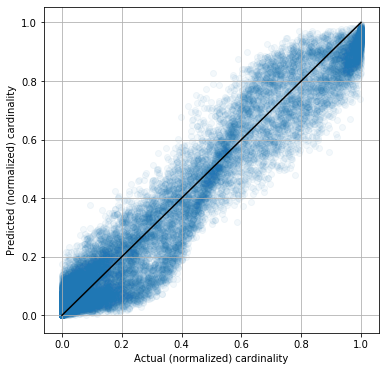

In [210]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_out,alpha=0.05)
plt.xlabel('Actual (normalized) cardinality')
plt.ylabel('Predicted (normalized) cardinality')
plt.plot([0,1],[0,1],color='black')
plt.grid()

In [215]:
svr_regr = SVR()
svr_regr.fit(np.array(X_train),np.array(y_train))
y_out = svr_regr.predict(np.array(X_test))

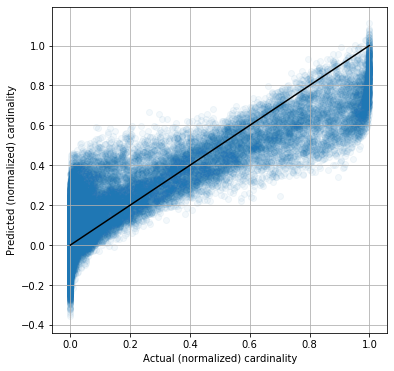

In [216]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_out,alpha=0.05)
plt.xlabel('Actual (normalized) cardinality')
plt.ylabel('Predicted (normalized) cardinality')
plt.plot([0,1],[0,1],color='black')
plt.grid()